<a href="https://colab.research.google.com/github/tanmey007/Cardiotocograms/blob/main/PA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the final project submission of predictive analytics course of CMI, M.Sc Data science program. 

Tanmey Rawal

MDS201938

3rd Sem Data Science

## Libraries imported

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,precision_recall_curve
import numpy as np
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

## Uploading dataset

In [ ]:
uploaded=files.upload()

Saving CTG.xls to CTG.xls


In [ ]:
dataset = pd.read_excel(r'CTG.xls', sheet_name='Data',skiprows=1)

In [ ]:
dataset.shape

(2129, 46)

## Modifying dataset

In [ ]:
dataset.head(5)

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Unnamed: 31,A,B,C,D,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,NaN,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


Removing empty columns

In [ ]:
dataset = dataset.dropna(axis=1, how='all') 

In [ ]:
dataset.columns

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'LB', 'AC.1',
       'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS',
       'SUSP', 'CLASS', 'NSP'],
      dtype='object')

Removing columns b,e, AC, FM, UC, DL, DS, DP, DR and would rename the one columns as normal one, Removing all classes of FHR

In [ ]:
dataset=dataset.drop(columns=['b','e','AC','FM','UC','DL','DS','DP','DR','Tendency','A','B','C','D','E','AD','DE','LD','FS','SUSP'])

In [ ]:
dataset= dataset.rename(columns={'AC.1':'AC','FM.1':'FM','UC.1':'UC','DL.1':'DL','DS.1':'DS','DP.1':'DP'})

In [ ]:
dataset.isnull().sum()

LB          3
AC          3
FM          2
UC          2
DL          1
DS          1
DP          1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
CLASS       3
NSP         3
dtype: int64

Removing missing values

In [ ]:
dataset = dataset.dropna(axis=0, how='any')

In [ ]:
dataset.shape

(2126, 22)

We have removed only 3 rows, at the end we have 2126 datapoints.

## Visualizing dataset

### Distribution classes

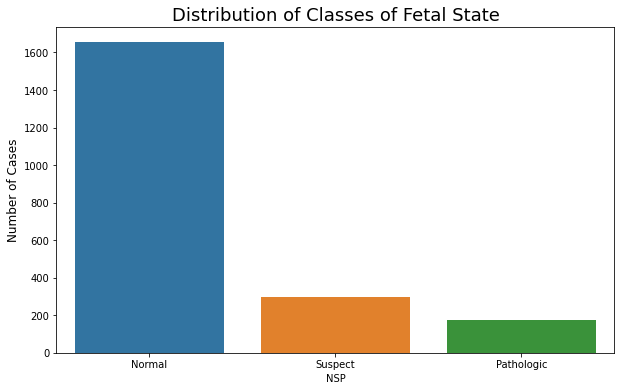

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='NSP',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))
plt.ylabel('Number of Cases', fontsize=12)
plt.title('Distribution of Classes of Fetal State', fontsize=18)
plt.show()

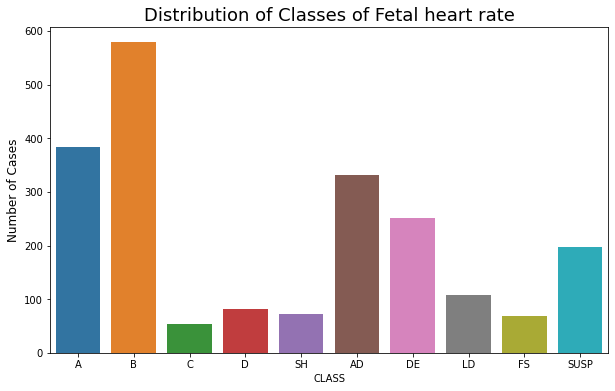

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='CLASS',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.ylabel('Number of Cases', fontsize=12)
plt.title('Distribution of Classes of Fetal heart rate', fontsize=18)
plt.show()

In [ ]:
dataset[['CLASS','NSP']].value_counts().sort_index()

CLASS  NSP
1.0    1.0    382
       2.0      2
2.0    1.0    579
3.0    1.0     53
4.0    1.0     81
5.0    1.0      3
       2.0     69
6.0    1.0    330
       2.0      2
7.0    1.0    227
       2.0     25
8.0    3.0    107
9.0    2.0      1
       3.0     68
10.0   2.0    196
       3.0      1
dtype: int64

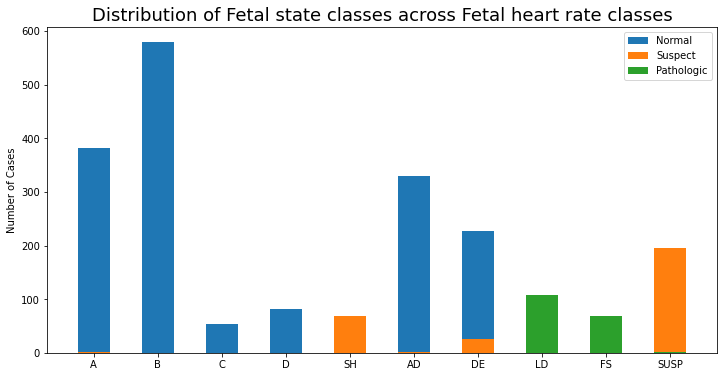

In [ ]:
x = dataset[['CLASS','NSP']]
N = 10
zeroesddf = pd.DataFrame(data=np.zeros(10,),index=[1,2,3,4,5,6,7,8,9,10])

ind = np.arange(N)    # the x locations for the groups
width = 0.50    # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(12,6))

for nsp_i in [1,2,3]:
    norm = x.loc[(x['NSP']==nsp_i)].drop('NSP', axis=1)
    norm = (pd.value_counts(norm['CLASS'].values, sort=False)).sort_index()
    norm = pd.DataFrame(data=norm, index=norm.index)
    norm = zeroesddf.add(norm,axis='index',fill_value=0) 
    norm = (norm.values).reshape(-1)
    if nsp_i == 1 :
        p1 = plt.bar(ind,norm, width)
    elif nsp_i == 2 :
        p2 = plt.bar(ind,norm,width)
    elif nsp_i == 3 :
        p3 = plt.bar(ind,norm,width)
    
plt.ylabel('Number of Cases')
plt.title('Distribution of Fetal state classes across Fetal heart rate classes',fontsize=18)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.legend((p1[0], p2[0], p3[0]), ('Normal', 'Suspect', 'Pathologic'))
plt.show()

### Heatmap

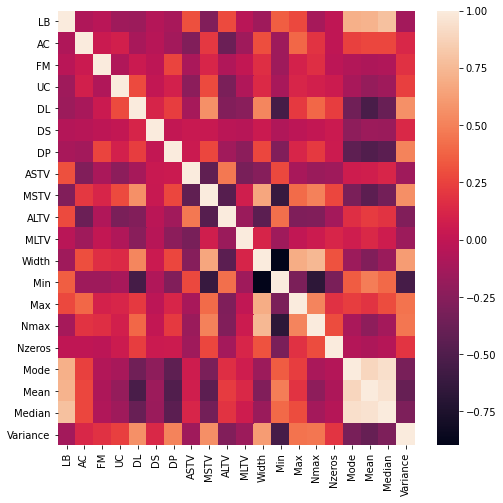

In [ ]:
dataset_num=dataset[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance']]
plt.figure(figsize=(8,8))
sns.heatmap(dataset_num.corr())

In [ ]:
dataset_num.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance
LB,1.000000,-0.080862,-0.033350,-0.146372,-0.158845,-0.054799,-0.105236,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938
AC,-0.080862,1.000000,0.046949,0.086653,-0.110934,-0.043733,-0.131007,-0.280089,0.207595,-0.374335,-0.144876,0.298922,-0.154934,0.393712,0.189319,-0.006412,0.243845,0.270496,0.272948,0.126380
FM,-0.033350,0.046949,1.000000,-0.069981,0.050401,-0.010824,0.265627,-0.103721,0.121213,-0.074190,0.011062,0.162657,-0.153883,0.099619,0.164450,-0.017855,-0.061042,-0.089502,-0.072175,0.179309
UC,-0.146372,0.086653,-0.069981,1.000000,0.287032,0.006751,0.087898,-0.229072,0.286907,-0.308000,-0.068487,0.140247,-0.111860,0.120195,0.081860,0.057815,-0.106559,-0.190340,-0.142111,0.238755
DL,-0.158845,-0.110934,0.050401,0.287032,1.000000,0.115216,0.231103,-0.117416,0.563260,-0.272250,-0.243174,0.520282,-0.553921,0.217002,0.397183,0.235296,-0.350232,-0.530564,-0.390822,0.567483
DS,-0.054799,-0.043733,-0.010824,0.006751,0.115216,1.000000,0.009848,0.037306,0.034632,-0.030506,-0.041751,0.044434,-0.071670,-0.021600,0.006892,0.049462,-0.216356,-0.162154,-0.165038,0.132999
DP,-0.105236,-0.131007,0.265627,0.087898,0.231103,0.009848,1.000000,0.048813,0.268688,-0.138521,-0.226737,0.266457,-0.278293,0.120019,0.221066,0.057278,-0.437137,-0.492250,-0.448311,0.505023
ASTV,0.305570,-0.280089,-0.103721,-0.229072,-0.117416,0.037306,0.048813,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434
MSTV,-0.279607,0.207595,0.121213,0.286907,0.563260,0.034632,0.268688,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852
ALTV,0.285630,-0.374335,-0.074190,-0.308000,-0.272250,-0.030506,-0.138521,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536


In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['Min', 'Nmax', 'Mode', 'Mean', 'Median']

### Boxplot of Fetal State

Text(0.5, 1.0, 'Box Plot of LB across different fetal states')

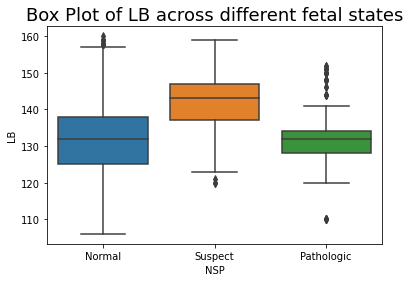

In [ ]:
sns.boxplot(x='NSP',y='LB',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))
plt.title('Box Plot of LB across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of AC across different fetal states')

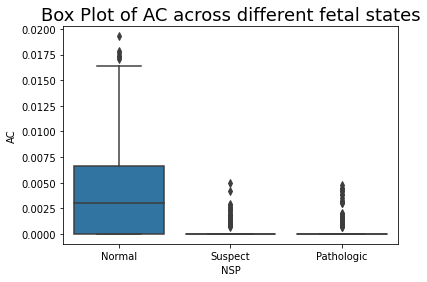

In [ ]:
sns.boxplot(x='NSP',y='AC',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))
plt.title('Box Plot of AC across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of FM across different fetal states')

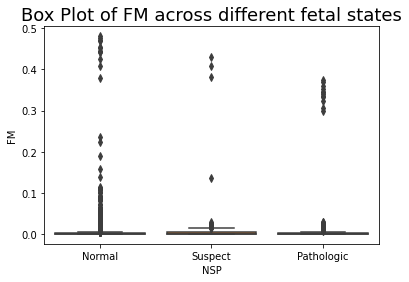

In [ ]:
sns.boxplot(x='NSP',y='FM',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))
plt.title('Box Plot of FM across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of UC across different fetal states')

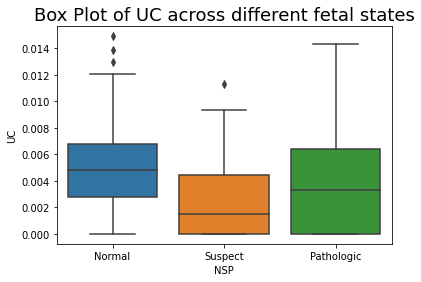

In [ ]:
sns.boxplot(x='NSP',y='UC',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of UC across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of ASTV across different fetal states')

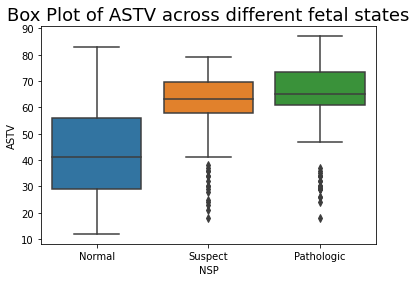

In [ ]:
sns.boxplot(x='NSP',y='ASTV',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of ASTV across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of MSTV across different fetal states')

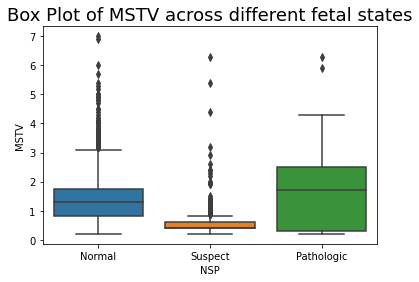

In [ ]:
sns.boxplot(x='NSP',y='MSTV',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of MSTV across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of DL across different fetal states')

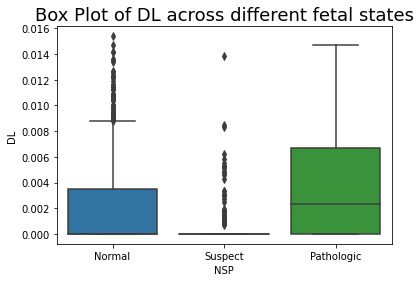

In [ ]:
sns.boxplot(x='NSP',y='DL',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of DL across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of DS across different fetal states')

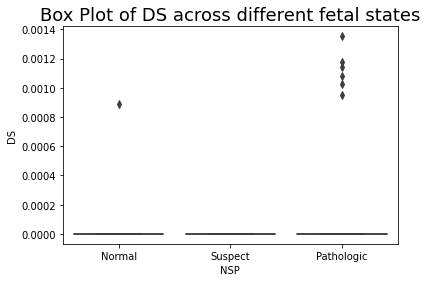

In [ ]:
sns.boxplot(x='NSP',y='DS',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of DS across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of DP across different fetal states')

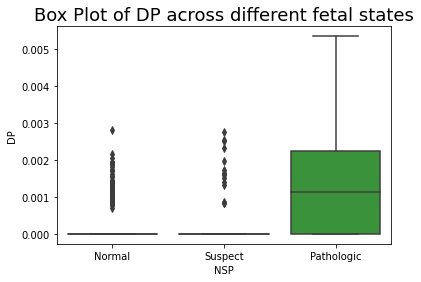

In [ ]:
sns.boxplot(x='NSP',y='DP',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of DP across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of ALTV across different fetal states')

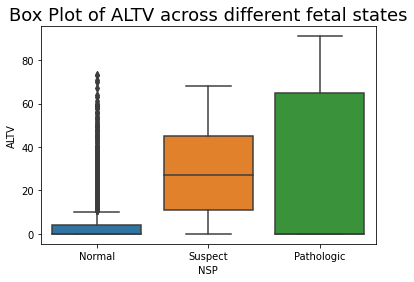

In [ ]:
sns.boxplot(x='NSP',y='ALTV',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of ALTV across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of MLTV across different fetal states')

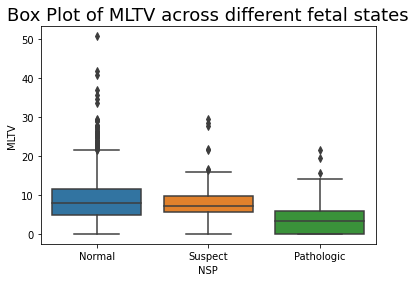

In [ ]:
sns.boxplot(x='NSP',y='MLTV',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of MLTV across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of Width across different fetal states')

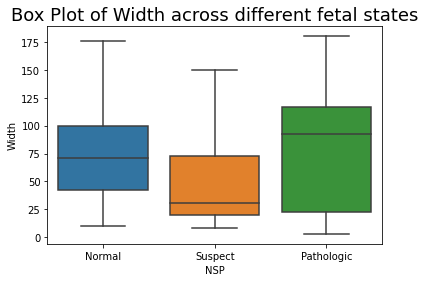

In [ ]:
sns.boxplot(x='NSP',y='Width',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of Width across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of Min across different fetal states')

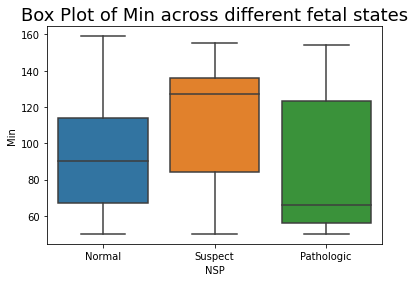

In [ ]:
sns.boxplot(x='NSP',y='Min',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of Min across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of Max across different fetal states')

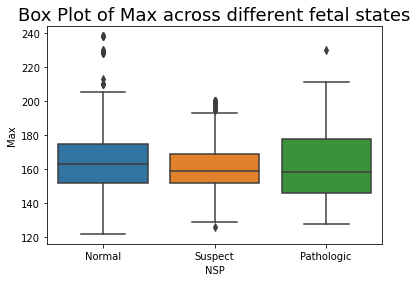

In [ ]:
sns.boxplot(x='NSP',y='Max',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of Max across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of Nmax across different fetal states')

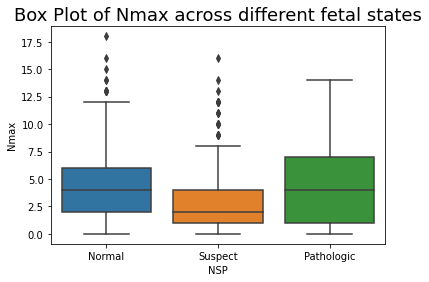

In [ ]:
sns.boxplot(x='NSP',y='Nmax',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of Nmax across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of Nzeros across different fetal states')

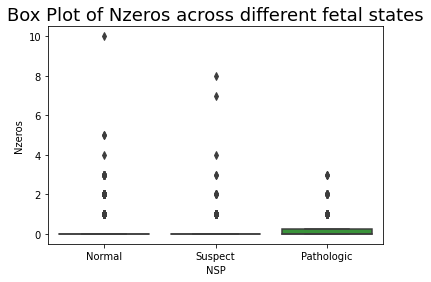

In [ ]:
sns.boxplot(x='NSP',y='Nzeros',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of Nzeros across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of Mode across different fetal states')

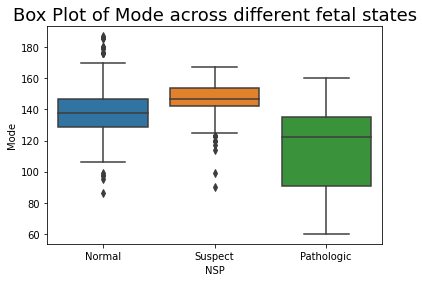

In [ ]:
sns.boxplot(x='NSP',y='Mode',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of Mode across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of Mean across different fetal states')

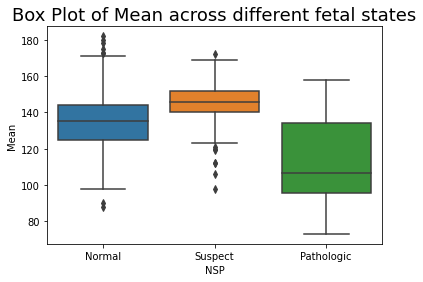

In [ ]:
sns.boxplot(x='NSP',y='Mean',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of Mean across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of Median across different fetal states')

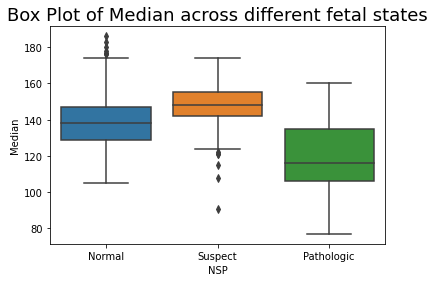

In [ ]:
sns.boxplot(x='NSP',y='Median',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of Median across different fetal states',fontsize=18)

Text(0.5, 1.0, 'Box Plot of Variance across different fetal states')

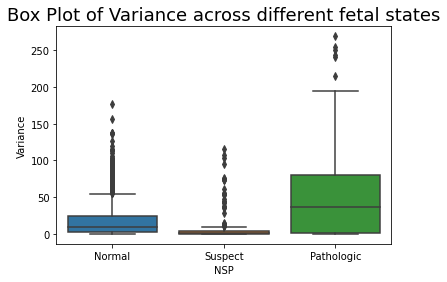

In [ ]:
sns.boxplot(x='NSP',y='Variance',data=dataset)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Normal', 'Suspect', 'Pathologic'))

plt.title('Box Plot of Variance across different fetal states',fontsize=18)

### Boxplot of Fetal heart rate

<Figure size 1080x1080 with 0 Axes>

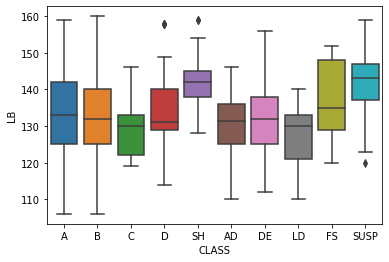

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='LB',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

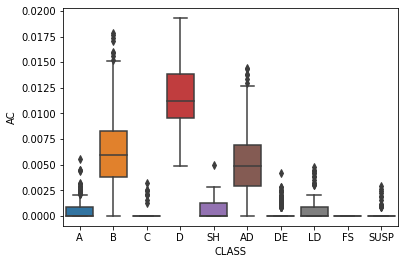

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='AC',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

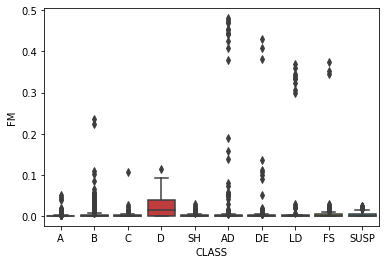

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='FM',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

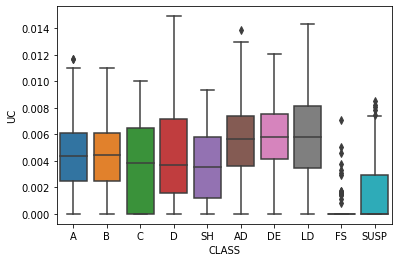

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='UC',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

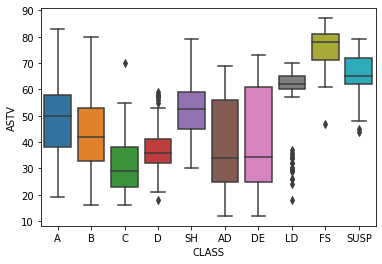

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='ASTV',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

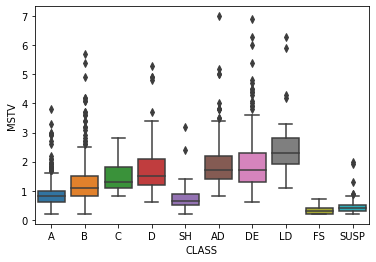

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='MSTV',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

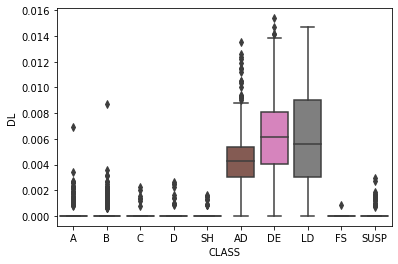

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='DL',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

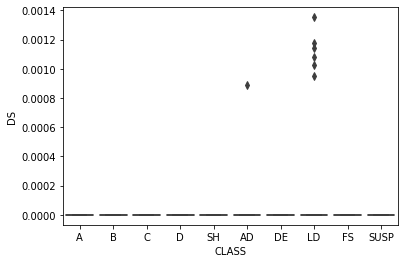

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='DS',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

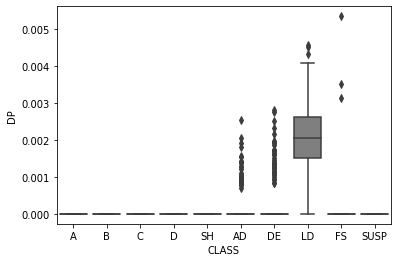

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='DP',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

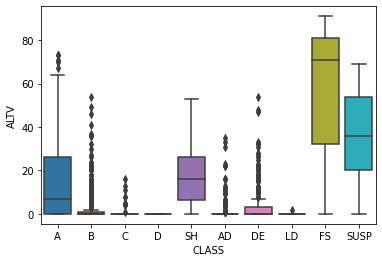

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='ALTV',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

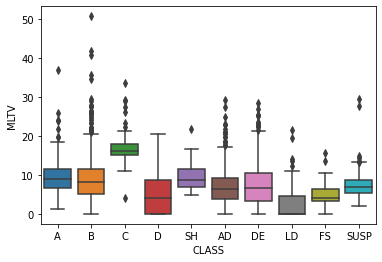

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='MLTV',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

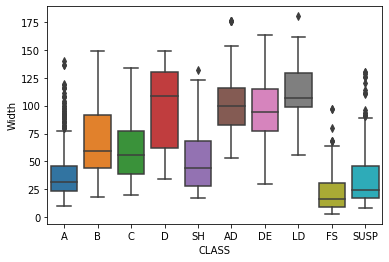

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='Width',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

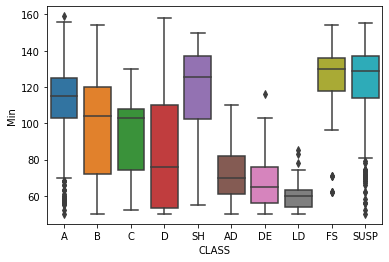

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='Min',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

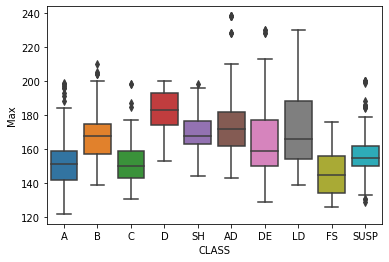

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='Max',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

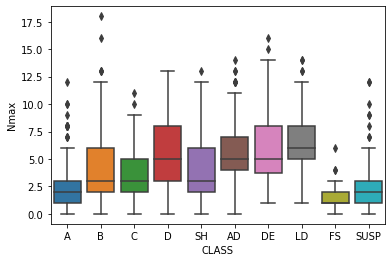

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='Nmax',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

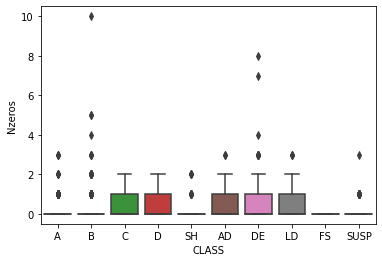

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='Nzeros',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

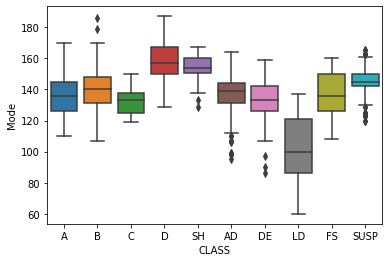

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='Mode',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

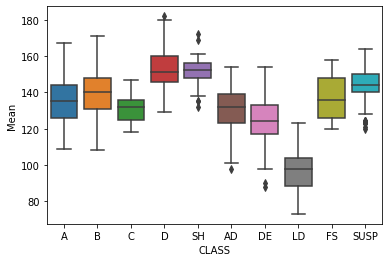

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='Mean',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

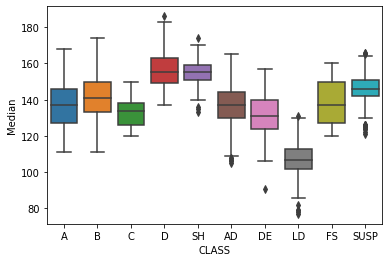

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='Median',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

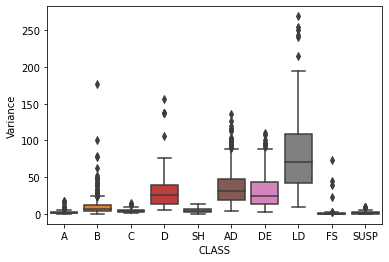

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x='CLASS',y='Variance',data=dataset)
N = 10
ind = np.arange(N)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.figure(figsize=(15,15))

### Histograms

Text(0, 0.5, 'Frequency')

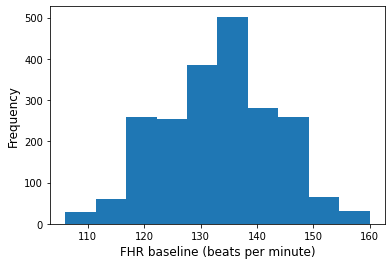

In [ ]:
plt.hist(dataset['LB'])
plt.xlabel('FHR baseline (beats per minute)', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

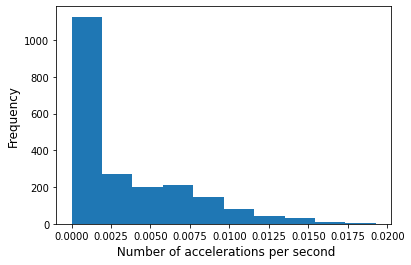

In [ ]:
plt.hist(dataset['AC'])
plt.xlabel(' Number of accelerations per second', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

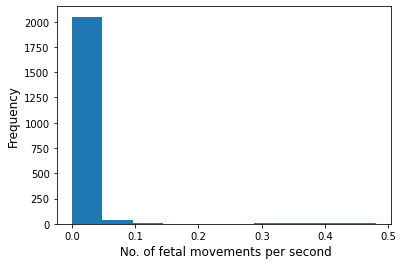

In [ ]:
plt.hist(dataset['FM'])
plt.xlabel(' No. of fetal movements per second', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
#plt.title('Histogram of fetal movements per second', fontsize=18)

Text(0, 0.5, 'Frequency')

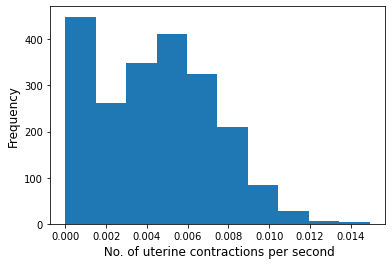

In [ ]:
plt.hist(dataset['UC'])
plt.xlabel(' No. of uterine contractions per second', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
#plt.title('Histogram of uterine contractions per second', fontsize=18)

Text(0, 0.5, 'Frequency')

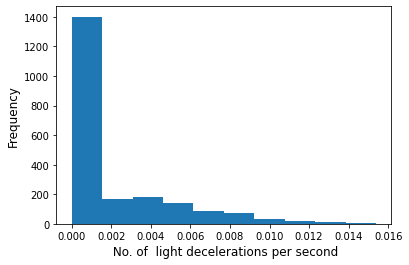

In [ ]:
plt.hist(dataset['DL'])
plt.xlabel(' No. of  light decelerations per second', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
#plt.title('Histogram of light decelerations per second', fontsize=18)

Text(0, 0.5, 'Frequency')

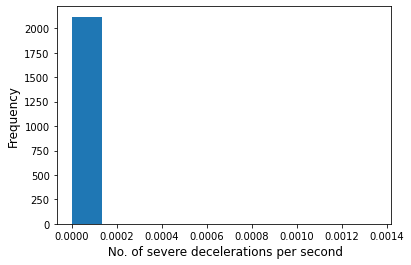

In [ ]:
plt.hist(dataset['DS'])
plt.xlabel(' No. of severe decelerations per second', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
#plt.title('Histogram of severe decelerations per second', fontsize=18)

Text(0, 0.5, 'Frequency')

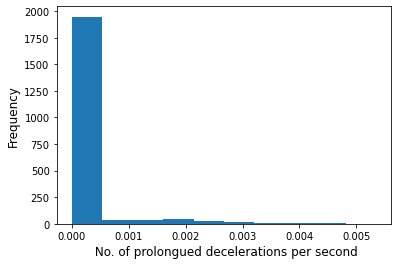

In [ ]:
plt.hist(dataset['DP'])
plt.xlabel(' No. of prolongued decelerations per second', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
#plt.title('Histogram of prolongued decelerations per second', fontsize=18)

Text(0, 0.5, 'Frequency')

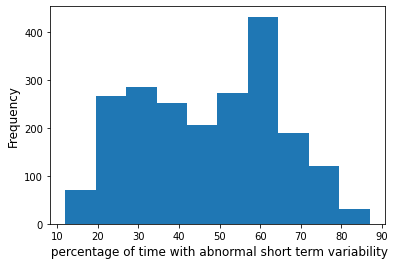

In [ ]:
plt.hist(dataset['ASTV'])
plt.xlabel(' percentage of time with abnormal short term variability', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

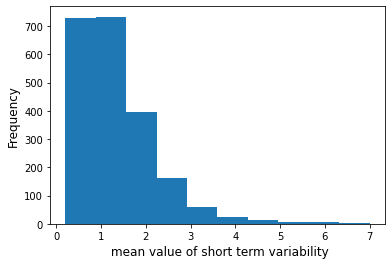

In [ ]:
plt.hist(dataset['MSTV'])
plt.xlabel(' mean value of short term variability', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

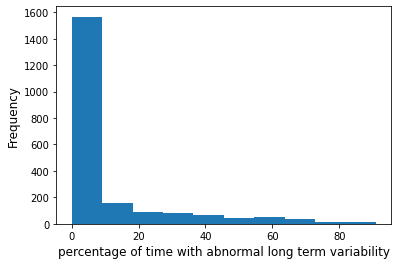

In [ ]:
plt.hist(dataset['ALTV'])
plt.xlabel('percentage of time with abnormal long term variability', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

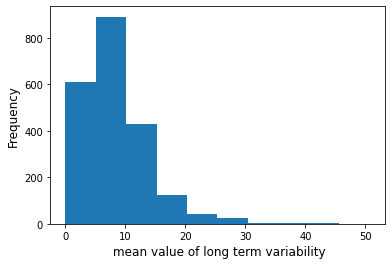

In [ ]:
plt.hist(dataset['MLTV'])
plt.xlabel(' mean value of long term variability', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

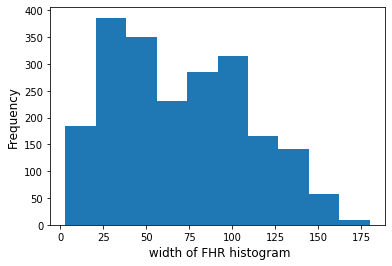

In [ ]:
plt.hist(dataset['Width'])
plt.xlabel(' width of FHR histogram', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

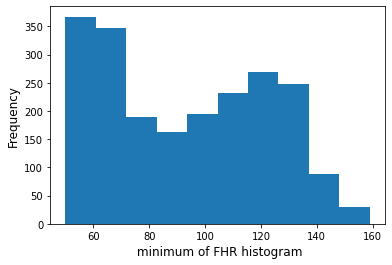

In [ ]:
plt.hist(dataset['Min'])
plt.xlabel(' minimum of FHR histogram', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

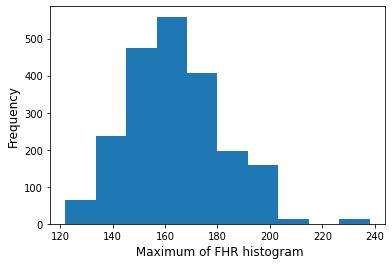

In [ ]:
plt.hist(dataset['Max'])
plt.xlabel(' Maximum of FHR histogram', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

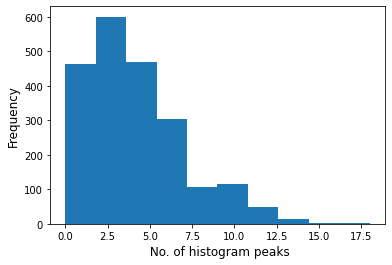

In [ ]:
plt.hist(dataset['Nmax'])
plt.xlabel(' No. of histogram peaks', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

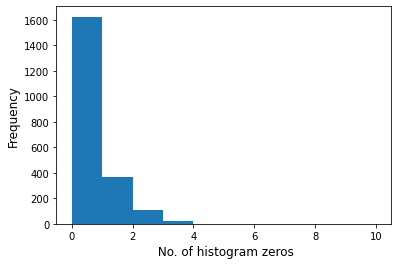

In [ ]:
plt.hist(dataset['Nzeros'])
plt.xlabel(' No. of histogram zeros', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

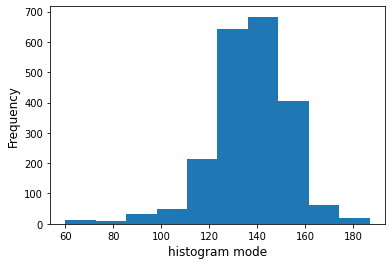

In [ ]:
plt.hist(dataset['Mode'])
plt.xlabel('histogram mode', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

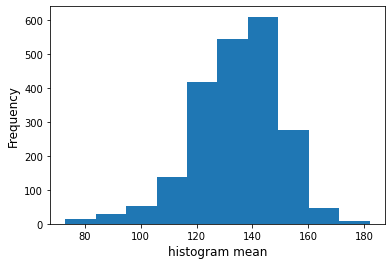

In [ ]:
plt.hist(dataset['Mean'])
plt.xlabel('histogram mean', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

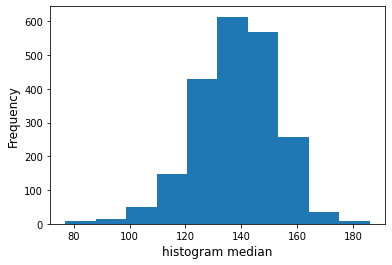

In [ ]:
plt.hist(dataset['Median'])
plt.xlabel('histogram median', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

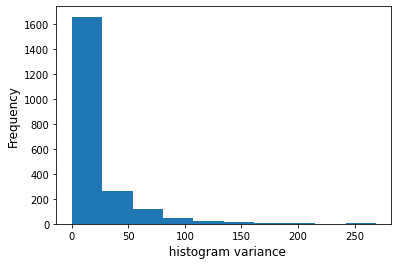

In [ ]:
plt.hist(dataset['Variance'])
plt.xlabel('  histogram variance', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

## Creating training and test set

In [ ]:
X_train,X_test=train_test_split(dataset, test_size=0.2, random_state=4)

In [ ]:
y_fhr_train=X_train['CLASS'].copy()

In [ ]:
y_nsp_train=X_train['NSP'].copy()

In [ ]:
y_fhr_test=X_test['CLASS'].copy()

In [ ]:
y_nsp_test=X_test['NSP'].copy()

In [ ]:
X_train=X_train.drop(['CLASS','NSP'],axis=1)

In [ ]:
X_test=X_test.drop(['CLASS','NSP'],axis=1)

In [ ]:
y_fhr_test.unique()

array([ 8., 10.,  2.,  4.,  6.,  7.,  1.,  3.,  5.,  9.])

In [ ]:
y_nsp_test.unique()

array([3., 2., 1.])

## Standardizing dataset

In [ ]:
std_scaler=StandardScaler()
X_standard_train=std_scaler.fit_transform(X_train)

In [ ]:
X_standard_test=std_scaler.transform(X_test)

# Classification

## Classification models for NSP

### Base Estimator

In [ ]:
class Alwaysone(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.ones((len(X), 1), dtype=bool)

In [ ]:
base_nsp = Alwaysone()
base_nsp.fit(X_standard_train, y_nsp_train)

In [ ]:
base_pred_nsp=base_nsp.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,base_pred_nsp)

array([[334,   0,   0],
       [ 62,   0,   0],
       [ 30,   0,   0]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,base_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.78      1.00      0.88       334
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        30

    accuracy                           0.78       426
   macro avg       0.26      0.33      0.29       426
weighted avg       0.61      0.78      0.69       426



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [ ]:
tree_nsp=DecisionTreeClassifier()

In [ ]:
parameters = [{'splitter':['best','random'],
               'max_depth':[2,4,6,8,10,12,14,16,18,20,21],}]
grid_tree_nsp = GridSearchCV(tree_nsp,
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 2)
grid_tree_nsp.fit(X_standard_train, y_nsp_train)

In [ ]:
grid_tree_nsp.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_pred_nsp=grid_tree_nsp.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,tree_pred_nsp)

array([[315,  19,   0],
       [  8,  53,   1],
       [  2,   1,  27]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,tree_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.97      0.94      0.96       334
         2.0       0.73      0.85      0.79        62
         3.0       0.96      0.90      0.93        30

    accuracy                           0.93       426
   macro avg       0.89      0.90      0.89       426
weighted avg       0.93      0.93      0.93       426



### Logistic Regression

In [ ]:
lr_classifier_nsp = LogisticRegression(random_state = 4, max_iter=10000)
lr_classifier_nsp.fit(X_standard_train, y_nsp_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred_nsp=lr_classifier_nsp.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,lr_pred_nsp)

array([[318,  14,   2],
       [ 13,  48,   1],
       [  5,   6,  19]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,lr_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       334
         2.0       0.71      0.77      0.74        62
         3.0       0.86      0.63      0.73        30

    accuracy                           0.90       426
   macro avg       0.84      0.79      0.81       426
weighted avg       0.91      0.90      0.90       426



### KNN

In [ ]:
parameters = [{'n_neighbors':[3,4,5,6,7,8],
               'weights':['uniform', 'distance'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size':[10,20,30,40],}]
grid_knn_nsp = GridSearchCV(KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_knn_nsp.fit(X_standard_train, y_nsp_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'leaf_size': [10, 20, 30, 40],
                          'n_neighbors': [3, 4, 5, 6, 7, 8],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [ ]:
grid_knn_nsp.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [ ]:
grid_knn_nsp.best_estimator_.fit(X_standard_train, y_nsp_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [ ]:
knn_pred_nsp=grid_knn_nsp.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,knn_pred_nsp)

array([[322,  12,   0],
       [ 16,  45,   1],
       [  1,   3,  26]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,knn_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       334
         2.0       0.75      0.73      0.74        62
         3.0       0.96      0.87      0.91        30

    accuracy                           0.92       426
   macro avg       0.89      0.85      0.87       426
weighted avg       0.92      0.92      0.92       426



### LDA

In [ ]:
parameters = [{'shrinkage':[None,'auto',0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
               'solver':['svd', 'lsqr', 'eigen'],}]
grid_lda_nsp = GridSearchCV(LinearDiscriminantAnalysis(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_lda_nsp.fit(X_standard_train, y_nsp_train)

In [ ]:
grid_lda_nsp.best_estimator_

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.9,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [ ]:
grid_lda_nsp.best_estimator_.fit(X_standard_train, y_nsp_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.9,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [ ]:
lda_pred_nsp=grid_lda_nsp.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,lda_pred_nsp)

array([[291,  37,   6],
       [  9,  51,   2],
       [  1,   9,  20]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,lda_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       334
         2.0       0.53      0.82      0.64        62
         3.0       0.71      0.67      0.69        30

    accuracy                           0.85       426
   macro avg       0.74      0.79      0.75       426
weighted avg       0.88      0.85      0.86       426



### QDA

In [ ]:
parameters = [{'reg_param':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],}]
grid_qda_nsp = GridSearchCV(QuadraticDiscriminantAnalysis(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_qda_nsp.fit(X_standard_train, y_nsp_train)

In [ ]:
grid_qda_nsp.best_estimator_

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.7,
                              store_covariance=False, tol=0.0001)

In [ ]:
qda_pred_nsp=grid_qda_nsp.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,qda_pred_nsp)

array([[293,  34,   7],
       [  7,  54,   1],
       [  1,   7,  22]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,qda_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.97      0.88      0.92       334
         2.0       0.57      0.87      0.69        62
         3.0       0.73      0.73      0.73        30

    accuracy                           0.87       426
   macro avg       0.76      0.83      0.78       426
weighted avg       0.90      0.87      0.88       426



### Support Vector

In [ ]:
parameters = [{'C': [0.5,1],  
               'gamma': ['scale','auto'], 
               'kernel': ['linear','rbf','poly'],}]
grid_svc_nsp = GridSearchCV(SVC(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_svc_nsp.fit(X_standard_train, y_nsp_train)

In [ ]:
grid_svc_nsp.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
grid_svc_nsp.best_estimator_.fit(X_standard_train, y_nsp_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred_nsp=grid_svc_nsp.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,svc_pred_nsp)

array([[322,  10,   2],
       [ 18,  44,   0],
       [  2,   6,  22]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,svc_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       334
         2.0       0.73      0.71      0.72        62
         3.0       0.92      0.73      0.81        30

    accuracy                           0.91       426
   macro avg       0.86      0.80      0.83       426
weighted avg       0.91      0.91      0.91       426



### Random forest

In [ ]:
parameters = [
{'n_estimators': [10,30,50,70,100],
 'criterion':['gini', 'entropy'],
 'max_depth': [2,4,6,8,10,12,14,16,18,20,21],
 'max_features': [2, 4, 6, 8,10,12],
 'bootstrap':[True,False]}]
grid_rf_nsp = GridSearchCV(RandomForestClassifier(random_state=4),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_rf_nsp.fit(X_standard_train, y_nsp_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=4,
                                   

In [ ]:
grid_rf_nsp.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [ ]:
grid_rf_nsp.best_estimator_.fit(X_standard_train, y_nsp_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [ ]:
rf_pred_nsp=grid_rf_nsp.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,rf_pred_nsp)

array([[320,  13,   1],
       [ 10,  52,   0],
       [  0,   1,  29]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,rf_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.97      0.96      0.96       334
         2.0       0.79      0.84      0.81        62
         3.0       0.97      0.97      0.97        30

    accuracy                           0.94       426
   macro avg       0.91      0.92      0.91       426
weighted avg       0.94      0.94      0.94       426



### SGD Classifier

In [ ]:
parameters=[{'alpha':[0.0001,0.001,0.01,0.1,1],
             'loss':['hinge','log','modified_huber','squared_hinge','perceptron'],
             'penalty':['l2', 'l1', 'elasticnet'],
             }]
grid_sgd_nsp = GridSearchCV(SGDClassifier(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_sgd_nsp.fit(X_standard_train, y_nsp_train)

In [ ]:
grid_sgd_nsp.best_estimator_

In [ ]:

grid_sgd_nsp.best_estimator_.fit(X_standard_train, y_nsp_train)

In [ ]:
sgd_pred_nsp=grid_sgd_nsp.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,sgd_pred_nsp)

In [ ]:
print('Reports\n',classification_report(y_nsp_test,sgd_pred_nsp))

### Passive aggressive classifier

In [ ]:
parameters=[{'C':[0.0001,0.001,0.01,0.1,1],}]
grid_pag_nsp = GridSearchCV(PassiveAggressiveClassifier(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_pag_nsp.fit(X_standard_train, y_nsp_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=PassiveAggressiveClassifier(C=1.0, average=False,
                                                   class_weight=None,
                                                   early_stopping=False,
                                                   fit_intercept=True,
                                                   loss='hinge', max_iter=1000,
                                                   n_iter_no_change=5,
                                                   n_jobs=None,
                                                   random_state=None,
                                                   shuffle=True, tol=0.001,
                                                   validation_fraction=0.1,
                                                   verbose=0,
                                                   warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1]}],


In [ ]:
grid_pag_nsp.best_estimator_

PassiveAggressiveClassifier(C=0.01, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
grid_pag_nsp.best_estimator_.fit(X_standard_train, y_nsp_train)

PassiveAggressiveClassifier(C=0.01, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
pag_pred_nsp=grid_pag_nsp.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,pag_pred_nsp)

array([[320,  11,   3],
       [ 14,  48,   0],
       [  3,   6,  21]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,pag_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       334
         2.0       0.74      0.77      0.76        62
         3.0       0.88      0.70      0.78        30

    accuracy                           0.91       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.91      0.91      0.91       426



### LGBM classifier

In [ ]:
gbm = lgb.LGBMClassifier(max_depth=5, class_weight='balanced',
                        learning_rate=1, n_estimators=500, random_state=4)


In [ ]:
# values to try for cross-validation
learning_rates = [0.01,0.1,1]
n_iterations_vals = [50,200,1000]
tree_depths = [1,2,4,8,16]

gbm_grid = {"max_depth": tree_depths, 
            "learning_rate": learning_rates, 
            "n_estimators": n_iterations_vals}

# stratified 5-fold cross-validation
cv_boost = GridSearchCV(gbm, gbm_grid, scoring='balanced_accuracy',
    n_jobs=-1, refit=True, verbose=True, return_train_score=False, cv=5)
cv_boost.fit(X_standard_train, y_nsp_train)

print('The best out-of-sample performance is {}'.format(cv_boost.best_score_))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  2.1min finished


The best out-of-sample performance is 0.9181224134657244


In [ ]:
pred = cv_boost.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,pred)

array([[316,  16,   2],
       [  4,  58,   0],
       [  0,   1,  29]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,pred))

Reports
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       334
         2.0       0.77      0.94      0.85        62
         3.0       0.94      0.97      0.95        30

    accuracy                           0.95       426
   macro avg       0.90      0.95      0.92       426
weighted avg       0.95      0.95      0.95       426



### XGB classifier

In [ ]:
xgb_classifier_nsp  =XGBClassifier()
xgb_classifier_nsp.fit(X_standard_train, y_nsp_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_pred_nsp=xgb_classifier_nsp.predict(X_standard_test)

In [ ]:
confusion_matrix(y_nsp_test,xgb_pred_nsp)

array([[322,  11,   1],
       [  8,  54,   0],
       [  0,   1,  29]])

In [ ]:
print('Reports\n',classification_report(y_nsp_test,xgb_pred_nsp))

Reports
               precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       334
         2.0       0.82      0.87      0.84        62
         3.0       0.97      0.97      0.97        30

    accuracy                           0.95       426
   macro avg       0.92      0.93      0.93       426
weighted avg       0.95      0.95      0.95       426



## Classification models for Fetal Heart Rate (FHR)

### Base Estimator

In [ ]:
class Alwaystwo(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.full((len(X)), 2)

In [ ]:
base_fhr = Alwaystwo()
base_fhr.fit(X_standard_train, y_fhr_train)

In [ ]:
base_pred_fhr=base_fhr.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,base_pred_fhr)

array([[  0,  80,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 126,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   9,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  14,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  14,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  60,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  47,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  19,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  10,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  47,   0,   0,   0,   0,   0,   0,   0,   0]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,base_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        80
         2.0       0.30      1.00      0.46       126
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00        14
         5.0       0.00      0.00      0.00        14
         6.0       0.00      0.00      0.00        60
         7.0       0.00      0.00      0.00        47
         8.0       0.00      0.00      0.00        19
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        47

    accuracy                           0.30       426
   macro avg       0.03      0.10      0.05       426
weighted avg       0.09      0.30      0.14       426



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [ ]:
parameters = [{'splitter':['best','random'],
               'max_depth':[2,4,6,8,10,12,14,16,18,20,21],}]
grid_tree_fhr = GridSearchCV(DecisionTreeClassifier(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_tree_fhr.fit(X_standard_train, y_fhr_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 21

In [ ]:
grid_tree_fhr.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_pred_fhr=grid_tree_fhr.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,tree_pred_fhr)

array([[ 63,   7,   0,   0,   6,   2,   0,   0,   0,   2],
       [  6, 106,   1,   8,   2,   2,   0,   0,   0,   1],
       [  4,   2,   3,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,  12,   0,   0,   0,   0,   0,   0],
       [  4,   2,   0,   0,   6,   0,   0,   0,   0,   2],
       [  0,   6,   0,   0,   0,  53,   1,   0,   0,   0],
       [  3,   0,   0,   0,   1,   4,  35,   4,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  18,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8,   2],
       [  8,   0,   0,   0,   2,   0,   1,   1,   3,  32]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,tree_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.72      0.79      0.75        80
         2.0       0.85      0.84      0.84       126
         3.0       0.75      0.33      0.46         9
         4.0       0.60      0.86      0.71        14
         5.0       0.35      0.43      0.39        14
         6.0       0.85      0.88      0.87        60
         7.0       0.95      0.74      0.83        47
         8.0       0.78      0.95      0.86        19
         9.0       0.73      0.80      0.76        10
        10.0       0.82      0.68      0.74        47

    accuracy                           0.79       426
   macro avg       0.74      0.73      0.72       426
weighted avg       0.80      0.79      0.79       426



### Logistic Regression

In [ ]:
lr_classifier_fhr = LogisticRegression(random_state = 4, max_iter=10000)
lr_classifier_fhr.fit(X_standard_train, y_fhr_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred_fhr=lr_classifier_fhr.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,lr_pred_fhr)

array([[ 65,   4,   0,   0,   3,   2,   0,   0,   0,   6],
       [  3, 114,   0,   2,   4,   2,   0,   0,   0,   1],
       [  3,   2,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0,  10,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,  10,   0,   0,   0,   0,   2],
       [  0,   2,   0,   0,   0,  57,   1,   0,   0,   0],
       [  2,   0,   0,   0,   0,   3,  40,   1,   0,   1],
       [  0,   0,   0,   0,   0,   1,   2,  16,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4,   6],
       [ 13,   2,   0,   0,   0,   0,   0,   0,   2,  30]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,lr_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.76      0.81      0.78        80
         2.0       0.88      0.90      0.89       126
         3.0       1.00      0.44      0.62         9
         4.0       0.83      0.71      0.77        14
         5.0       0.59      0.71      0.65        14
         6.0       0.88      0.95      0.91        60
         7.0       0.93      0.85      0.89        47
         8.0       0.94      0.84      0.89        19
         9.0       0.67      0.40      0.50        10
        10.0       0.65      0.64      0.65        47

    accuracy                           0.82       426
   macro avg       0.81      0.73      0.75       426
weighted avg       0.82      0.82      0.82       426



### KNN

In [ ]:
parameters = [{'n_neighbors':[3,4,5,6,7,8],
               'weights':['uniform', 'distance'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size':[10,20,30,40],}]
grid_knn_fhr = GridSearchCV(KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_knn_fhr.fit(X_standard_train, y_fhr_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'leaf_size': [10, 20, 30, 40],
                          'n_neighbors': [3, 4, 5, 6, 7, 8],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [ ]:
grid_knn_fhr.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [ ]:
knn_pred_fhr=grid_knn_fhr.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,knn_pred_fhr)

array([[ 68,   2,   3,   0,   0,   0,   0,   0,   0,   7],
       [ 10, 106,   0,   3,   1,   3,   0,   0,   0,   3],
       [  1,   3,   4,   0,   0,   1,   0,   0,   0,   0],
       [  0,   4,   0,   9,   0,   1,   0,   0,   0,   0],
       [  4,   3,   0,   0,   6,   0,   0,   0,   0,   1],
       [  0,   6,   1,   0,   0,  47,   6,   0,   0,   0],
       [  2,   0,   1,   0,   0,   4,  39,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   0,  18,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   7,   2],
       [  9,   1,   0,   0,   3,   0,   0,   0,   2,  32]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,knn_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.72      0.85      0.78        80
         2.0       0.85      0.84      0.84       126
         3.0       0.44      0.44      0.44         9
         4.0       0.75      0.64      0.69        14
         5.0       0.55      0.43      0.48        14
         6.0       0.82      0.78      0.80        60
         7.0       0.87      0.83      0.85        47
         8.0       1.00      0.95      0.97        19
         9.0       0.78      0.70      0.74        10
        10.0       0.70      0.68      0.69        47

    accuracy                           0.79       426
   macro avg       0.75      0.71      0.73       426
weighted avg       0.79      0.79      0.79       426



### LDA

In [ ]:
parameters = [{'shrinkage':[None,'auto',0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
               'solver':['svd', 'lsqr', 'eigen'],}]
grid_lda_fhr = GridSearchCV(LinearDiscriminantAnalysis(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_lda_fhr.fit(X_standard_train, y_fhr_train)

In [ ]:
grid_lda_fhr.best_estimator_

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_pred_fhr=grid_lda_fhr.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,lda_pred_fhr)

array([[ 61,   0,   0,   0,   2,   1,   0,   0,   4,  12],
       [ 11, 109,   0,   1,   4,   0,   0,   0,   0,   1],
       [  5,   0,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0,  10,   0,   0,   0,   0,   0,   0],
       [  2,   1,   0,   0,   7,   0,   0,   0,   0,   4],
       [  2,   8,   0,   3,   0,  39,   8,   0,   0,   0],
       [  6,   0,   0,   0,   0,   1,  35,   3,   0,   2],
       [  0,   0,   0,   0,   0,   0,   2,  17,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   1,   3,   3],
       [ 12,   0,   0,   0,   0,   0,   0,   0,   4,  31]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,lda_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.60      0.76      0.67        80
         2.0       0.89      0.87      0.88       126
         3.0       1.00      0.44      0.62         9
         4.0       0.71      0.71      0.71        14
         5.0       0.54      0.50      0.52        14
         6.0       0.95      0.65      0.77        60
         7.0       0.78      0.74      0.76        47
         8.0       0.81      0.89      0.85        19
         9.0       0.27      0.30      0.29        10
        10.0       0.58      0.66      0.62        47

    accuracy                           0.74       426
   macro avg       0.71      0.65      0.67       426
weighted avg       0.77      0.74      0.75       426



### QDA

In [ ]:
parameters = [{'reg_param':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],}]
grid_qda_fhr = GridSearchCV(QuadraticDiscriminantAnalysis(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_qda_fhr.fit(X_standard_train, y_fhr_train)

In [ ]:
grid_qda_fhr.best_estimator_

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.1,
                              store_covariance=False, tol=0.0001)

In [ ]:
qda_pred_fhr=grid_qda_fhr.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,qda_pred_fhr)

array([[ 60,   1,   4,   0,   0,   0,   0,   0,   0,  15],
       [ 15, 100,   3,   2,   4,   0,   0,   0,   0,   2],
       [  1,   0,   7,   0,   0,   0,   1,   0,   0,   0],
       [  0,   2,   0,  12,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0,   0,   6,   0,   0,   0,   0,   5],
       [  2,  17,   0,   0,   0,  32,   9,   0,   0,   0],
       [  4,   1,   0,   0,   0,   0,  41,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   2,  17,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   4,   5],
       [  4,   1,   0,   0,   1,   0,   0,   0,   1,  40]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,qda_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.70      0.75      0.72        80
         2.0       0.80      0.79      0.80       126
         3.0       0.50      0.78      0.61         9
         4.0       0.86      0.86      0.86        14
         5.0       0.55      0.43      0.48        14
         6.0       1.00      0.53      0.70        60
         7.0       0.77      0.87      0.82        47
         8.0       0.89      0.89      0.89        19
         9.0       0.80      0.40      0.53        10
        10.0       0.60      0.85      0.70        47

    accuracy                           0.75       426
   macro avg       0.75      0.72      0.71       426
weighted avg       0.78      0.75      0.75       426



### Support Vector

In [ ]:
parameters = [{'C': [0.1,0.5,1],  
               'gamma': ['scale','auto'], 
               'kernel': ['linear','rbf','poly'],}]
grid_svc_fhr = GridSearchCV(SVC(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_svc_fhr.fit(X_standard_train, y_fhr_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [ ]:
grid_svc_fhr.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred_fhr=grid_svc_fhr.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,svc_pred_fhr)

array([[ 68,   2,   0,   0,   3,   2,   0,   0,   0,   5],
       [  4, 112,   0,   4,   3,   2,   0,   0,   0,   1],
       [  3,   2,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,  12,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,  10,   0,   0,   0,   0,   2],
       [  0,   3,   0,   0,   0,  56,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   4,  40,   1,   0,   1],
       [  0,   0,   0,   0,   0,   0,   2,  17,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7,   3],
       [ 11,   2,   0,   0,   1,   0,   0,   0,   2,  31]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,svc_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.78      0.85      0.81        80
         2.0       0.90      0.89      0.89       126
         3.0       1.00      0.44      0.62         9
         4.0       0.75      0.86      0.80        14
         5.0       0.59      0.71      0.65        14
         6.0       0.88      0.93      0.90        60
         7.0       0.93      0.85      0.89        47
         8.0       0.94      0.89      0.92        19
         9.0       0.78      0.70      0.74        10
        10.0       0.72      0.66      0.69        47

    accuracy                           0.84       426
   macro avg       0.83      0.78      0.79       426
weighted avg       0.84      0.84      0.84       426



### Random forest

In [ ]:
parameters = [
{'n_estimators': [10,30,50,70,100],
 'criterion':['gini', 'entropy'],
 'max_depth': [2,4,6,8,10,12,14,16,18,20,21],
 'max_features': [2, 4, 6, 8,10,12],
 'bootstrap':[True,False]}]
grid_rf_fhr = GridSearchCV(RandomForestClassifier(random_state=4),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_rf_fhr.fit(X_standard_train, y_fhr_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=4,
                                   

In [ ]:
grid_rf_fhr.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [ ]:
rf_pred_fhr=grid_rf_fhr.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,rf_pred_fhr)

array([[ 69,   4,   0,   0,   2,   2,   0,   0,   0,   3],
       [  5, 113,   0,   3,   3,   1,   0,   0,   0,   1],
       [  2,   1,   5,   0,   0,   0,   1,   0,   0,   0],
       [  0,   1,   0,  13,   0,   0,   0,   0,   0,   0],
       [  2,   4,   0,   0,   5,   0,   0,   0,   0,   3],
       [  0,   3,   0,   0,   0,  56,   1,   0,   0,   0],
       [  2,   0,   0,   0,   0,   4,  40,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  19,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8,   2],
       [  2,   1,   0,   0,   1,   0,   0,   0,   2,  41]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,rf_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.84      0.86      0.85        80
         2.0       0.89      0.90      0.89       126
         3.0       1.00      0.56      0.71         9
         4.0       0.81      0.93      0.87        14
         5.0       0.45      0.36      0.40        14
         6.0       0.89      0.93      0.91        60
         7.0       0.95      0.85      0.90        47
         8.0       0.95      1.00      0.97        19
         9.0       0.80      0.80      0.80        10
        10.0       0.82      0.87      0.85        47

    accuracy                           0.87       426
   macro avg       0.84      0.81      0.82       426
weighted avg       0.87      0.87      0.86       426



### SGD Classifier

In [ ]:
parameters=[{'alpha':[0.0001,0.001,0.01,0.1,1],
             'loss':['hinge','log','modified_huber','squared_hinge','perceptron'],
             'penalty':['l2', 'l1', 'elasticnet'],
             }]
grid_sgd_fhr = GridSearchCV(SGDClassifier(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_sgd_fhr.fit(X_standard_train, y_fhr_train)

In [ ]:
grid_sgd_fhr.best_estimator_

In [ ]:
sgd_pred_fhr=grid_sgd_fhr.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,sgd_pred_fhr)

In [ ]:
print('Reports\n',classification_report(y_fhr_test,sgd_pred_fhr))

### Passive aggressive classifier

In [ ]:
parameters=[{'C':[0.0001,0.001,0.01,0.1,1],}]
grid_pag_fhr = GridSearchCV(PassiveAggressiveClassifier(),
                           param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_pag_fhr.fit(X_standard_train, y_fhr_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=PassiveAggressiveClassifier(C=1.0, average=False,
                                                   class_weight=None,
                                                   early_stopping=False,
                                                   fit_intercept=True,
                                                   loss='hinge', max_iter=1000,
                                                   n_iter_no_change=5,
                                                   n_jobs=None,
                                                   random_state=None,
                                                   shuffle=True, tol=0.001,
                                                   validation_fraction=0.1,
                                                   verbose=0,
                                                   warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1]}],


In [ ]:
grid_pag_fhr.best_estimator_

PassiveAggressiveClassifier(C=0.1, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
pag_pred_fhr=grid_pag_fhr.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,pag_pred_fhr)

array([[ 56,   7,   0,   0,   3,   1,   1,   0,   0,  12],
       [  3, 117,   0,   1,   3,   2,   0,   0,   0,   0],
       [  7,   1,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   6,   0,   8,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0,   0,  10,   0,   0,   0,   0,   1],
       [  0,   8,   0,   0,   0,  44,   8,   0,   0,   0],
       [  2,   0,   0,   0,   0,   1,  41,   2,   1,   0],
       [  0,   0,   0,   0,   0,   0,   6,  13,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   1,   0,   7],
       [ 13,   3,   0,   0,   2,   0,   0,   0,   0,  29]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,pag_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.67      0.70      0.69        80
         2.0       0.81      0.93      0.86       126
         3.0       0.00      0.00      0.00         9
         4.0       0.89      0.57      0.70        14
         5.0       0.56      0.71      0.63        14
         6.0       0.92      0.73      0.81        60
         7.0       0.72      0.87      0.79        47
         8.0       0.81      0.68      0.74        19
         9.0       0.00      0.00      0.00        10
        10.0       0.59      0.62      0.60        47

    accuracy                           0.75       426
   macro avg       0.60      0.58      0.58       426
weighted avg       0.72      0.75      0.73       426



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LGBM classifier

In [ ]:
parameters=[{'learning_rates':[0.01,0.1,1],
             'n_iterations_vals':[50,200,1000],
             'tree_depths' : [1,2,4,8,16],}]

grid_gbm_fhr = GridSearchCV(lgb.LGBMClassifier(),param_grid = parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose = 0)
grid_gbm_fhr.fit(X_standard_train, y_fhr_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'learning_rates': [0.01, 0.1, 1],
                          'n_itera

In [ ]:
grid_gbm_fhr.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, learning_rates=0.01,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_iterations_vals=50,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, tree_depths=1)

In [ ]:
gbm_pred_fhr=grid_gbm_fhr.best_estimator_.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,gbm_pred_fhr)

array([[ 70,   3,   0,   0,   2,   2,   0,   0,   0,   3],
       [  3, 116,   0,   2,   2,   2,   0,   0,   0,   1],
       [  3,   1,   5,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,  12,   0,   1,   0,   0,   0,   0],
       [  1,   3,   0,   0,   7,   0,   0,   0,   0,   3],
       [  0,   2,   0,   0,   0,  57,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   3,  42,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,  18,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9,   1],
       [  3,   0,   0,   0,   2,   0,   0,   0,   1,  41]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,gbm_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.86      0.88      0.87        80
         2.0       0.92      0.92      0.92       126
         3.0       1.00      0.56      0.71         9
         4.0       0.86      0.86      0.86        14
         5.0       0.54      0.50      0.52        14
         6.0       0.88      0.95      0.91        60
         7.0       0.95      0.89      0.92        47
         8.0       0.95      0.95      0.95        19
         9.0       0.90      0.90      0.90        10
        10.0       0.84      0.87      0.85        47

    accuracy                           0.88       426
   macro avg       0.87      0.83      0.84       426
weighted avg       0.89      0.88      0.88       426



### XGB classifier

In [ ]:
xgb_classifier_fhr  =XGBClassifier()
xgb_classifier_fhr.fit(X_standard_train, y_fhr_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_pred_fhr=xgb_classifier_fhr.predict(X_standard_test)

In [ ]:
confusion_matrix(y_fhr_test,xgb_pred_fhr)

array([[ 70,   3,   0,   0,   2,   2,   0,   0,   0,   3],
       [  3, 116,   0,   2,   2,   2,   0,   0,   0,   1],
       [  3,   1,   5,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  14,   0,   0,   0,   0,   0,   0],
       [  1,   3,   0,   0,   7,   0,   0,   0,   0,   3],
       [  0,   4,   0,   0,   0,  55,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   4,  41,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  19,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9,   1],
       [  2,   0,   0,   0,   1,   0,   0,   0,   1,  43]])

In [ ]:
print('Reports\n',classification_report(y_fhr_test,xgb_pred_fhr))

Reports
               precision    recall  f1-score   support

         1.0       0.88      0.88      0.88        80
         2.0       0.91      0.92      0.92       126
         3.0       1.00      0.56      0.71         9
         4.0       0.88      1.00      0.93        14
         5.0       0.58      0.50      0.54        14
         6.0       0.87      0.92      0.89        60
         7.0       0.98      0.87      0.92        47
         8.0       0.95      1.00      0.97        19
         9.0       0.90      0.90      0.90        10
        10.0       0.84      0.91      0.88        47

    accuracy                           0.89       426
   macro avg       0.88      0.85      0.85       426
weighted avg       0.89      0.89      0.89       426

